Import package

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image, ImageOps
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import SGD
import joblib

Global variable
- data: all image in array format
- labels: labels of images
- classes: number of trafic sign type
- cur_path: current path of the project

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

class_names = {1: 'Speed limit (20km/h)',
           2: 'Speed limit (30km/h)',
           3: 'Speed limit (50km/h)',
           4: 'Speed limit (60km/h)',
           5: 'Speed limit (70km/h)',
           6: 'Speed limit (80km/h)',
           7: 'End of speed limit (80km/h)',
           8: 'Speed limit (100km/h)',
           9: 'Speed limit (120km/h)',
           10: 'No passing',
           11: 'No passing veh over 3.5 tons',
           12: 'Right-of-way at intersection',
           13: 'Priority road',
           14: 'Yield',
           15: 'Stop',
           16: 'No vehicles',
           17: 'Veh > 3.5 tons prohibited',
           18: 'No entry',
           19: 'General caution',
           20: 'Dangerous curve left',
           21: 'Dangerous curve right',
           22: 'Double curve',
           23: 'Bumpy road',
           24: 'Slippery road',
           25: 'Road narrows on the right',
           26: 'Road work',
           27: 'Traffic signals',
           28: 'Pedestrians',
           29: 'Children crossing',
           30: 'Bicycles crossing',
           31: 'Beware of ice/snow',
           32: 'Wild animals crossing',
           33: 'End speed + passing limits',
           34: 'Turn right ahead',
           35: 'Turn left ahead',
           36: 'Ahead only',
           37: 'Go straight or right',
           38: 'Go straight or left',
           39: 'Keep right',
           40: 'Keep left',
           41: 'Roundabout mandatory',
           42: 'End of no passing',
           43: 'End no passing veh > 3.5 tons'}


Retrieving the images and their labels 

In [3]:
for i in range(classes):
    path = os.path.join(cur_path,'dataset/train',str(i))
    imagePaths = os.listdir(path)

    for imagePath in imagePaths:
        try:
            image = Image.open(path + '\\'+ imagePath)
            image = ImageOps.grayscale(image)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

Converting lists into numpy arrays

Output explain:
- ({number_of_images}, {image_size}, {image_size}, {image_color_RGB})
- ({number_of_images})

In [4]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30) (39209,)


Splitting training and testing dataset

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.2, random_state=42)

# Scale the pixel intensities down to the 0-1 range:
X_train = X_train / 255
X_valid = X_valid / 255

print(X_train.shape, X_valid.shape,  y_train.shape, y_valid.shape)

(31367, 30, 30) (7842, 30, 30) (31367,) (7842,)


Plot some data

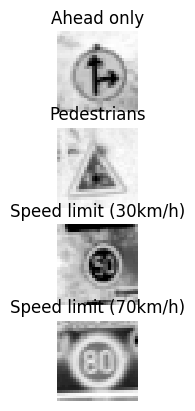

In [15]:
n_rows = 4
n_cols = 1
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.show()

Converting the labels into one hot encoding

[one-hot encoding explain](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/)

In [16]:
y_train = to_categorical(y_train, 43)
y_valid = to_categorical(y_valid, 43)

print(y_train.shape, y_valid.shape)

(31367, 43) (7842, 43)


Building the model

We are using **CNN** model, which is best for image classification purposes

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[30, 30]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_valid, y_valid))
history = history.history
joblib.dump(history,'model/CNN/history')
model.save("model/CNN/model.h5")

# Credit: ChatGPT

Try Fully Connected model

In [17]:
model = Sequential()
model.add(Flatten(input_shape=[30, 30]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(43, activation="softmax"))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=11, validation_data=(X_valid, y_valid))
history = history.history
joblib.dump(history,'model/FullyConnected/history')
model.save("model/FullyConnected/model.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               270300    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 43)                4343      
                                                                 
Total params: 304,743
Trainable params: 304,743
Non-trainable params: 0
_________________________________________________________________
Epoch 1/11
981/981 [==============================] - 5s 5ms/step - loss: 3.2968 - accuracy: 0.1881 - val_loss: 2.9389 - val_accuracy: 0.3133
Epoch 2/11
981/981 [==================

Plotting graphs for accuracy 

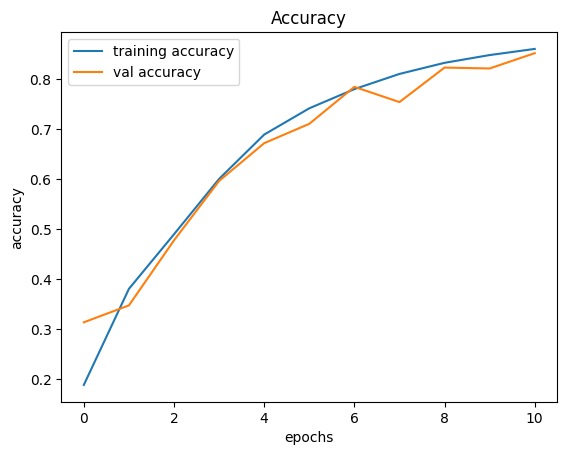

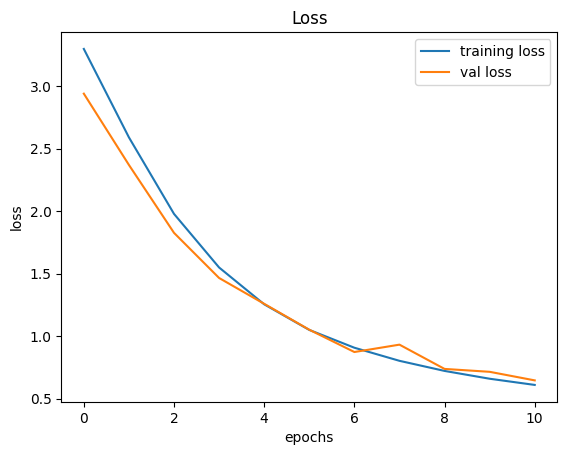

In [18]:
model = load_model('model/FullyConnected/model.h5')
history = joblib.load('model/FullyConnected/history')

plt.figure(0)
plt.plot(history['accuracy'], label='training accuracy')
plt.plot(history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history['loss'], label='training loss')
plt.plot(history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Testing accuracy on test dataset

In [ ]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('dataset/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open("dataset/" + img)
    image = ImageOps.grayscale(image)
    image = image.resize((30,30))
    image = np.array(image)
    data.append(np.array(image))

X_test=np.array(data)
X_test = X_test / 255

pred = model.predict(X_test)

Accuracy with the test data

In [ ]:
from sklearn.metrics import accuracy_score
classes_pred = np.argmax(pred, axis=1)
print(accuracy_score(labels, classes_pred))